# For modifying and testing new image creation

Hello!  This in Matt's quick tutorial on how to create new model images
## Step 1
### Load nessecary modules

In [1]:
# Add python modules
import numpy as np
import cv2
import matplotlib.pyplot as plt
from copy import deepcopy

# Add parent directory for custom modules
from sys import path as sysPath
sysPath.append('../')
sysPath.append('../Machine_Score/')

# Load custom modules that simr has loaded
import main_SIMR as simr
gm = simr.gm
im = simr.im
ic = simr.ic
ms = simr.ms
sa = simr.sa
dc = simr.ms.dc

simr.test()
gm.test()
im.test()
ic.test()
ms.test()
dc.test()
sa.test()

SIMR: Hi!  You're in Matthew's main program for all things galaxy collisions
GM: Hi!  You're in Matthew's module for generally useful functions and classes
IM: Hi!  You're in Matthew Ogden's information module for SPAM
IC: Hi!  You're in Matthew's main code for all things image creation.
MS: Hi!  You're in Matthew's SIMR module for all things machine scoring images
DC: Hi!  You're in direct_image_compare.py
SA: Hi!  You're in Matthew's Main program for score analysis!


___
## Step 2
### Load Target Info class
Needed for loading the target image and running through models later.

In [30]:
tDir = '../targetDir'
print('Before: \'%s\' \nAfter: \'%s\'' % (tDir,gm.validPath(tDir) ))
tDir = gm.validPath(tDir)

tInfo = im.target_info_class( targetDir = tDir, printAll=False)
if tInfo.status == False:
    print("WARNING")
else:
    print("Target Good!")

Before: '../targetDir' 
After: '/home/mbo2d/587722984435351614/'
Target Good!


___
## Step 3
### Load a starting image and image parameter for target
Loading a previous image allows you to start with the correct image size and pixel centers for an associated target image.

{'cmpArg': {'cmpMethod': 'correlation'},
 'imgArg': {'comment': 'Basic image '
                       'parameter file',
            'galaxy_centers': {'px': '513',
                               'py': '514',
                               'sx': '309',
                               'sy': '608'},
            'image_size': {'height': 1024,
                           'width': '1024'},
            'name': 'zoo_0',
            'target_id': '587722984435351614'},
 'name': 'zoo_0',
 'scoreType': 'target',
 'simArg': {'nPts': '100k',
            'name': '100k'},
 'targetName': 'zoo_0'}


Text(0.5, 1.0, 'Starting Target Image')

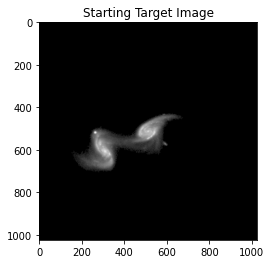

In [31]:
# Change image name if you want to grab a different image parameter
old_name = 'zoo_0'
old_params = tInfo.getImageParams(  )
old_param = old_params[old_name]

# This image parameter should have the correct size and pixel centers
gm.pprint( old_param )

tInfo.addImageParams( old_param, overWrite = True )

# Get target image for 
target_image = tInfo.getTargetImage(old_name)
plt.imshow(target_image,cmap='gray')
plt.title("Starting Target Image")



___
## Step 4: Create a new image parameter


In [17]:
# Create a blank group score parameter and copy starting parameters
newName = 'zoo_test'
new_params = {}
new_params[newName] = deepcopy( old_param )

# ALWAYS modify the names
new_params[newName]['name'] = newName
new_params[newName]['imgArg']['name'] = newName

# Leave a comment if its for a specific experiment
cmt = 'Demonstrating how to create a new image parameter'
new_params[newName]['imgArg']['comment'] = cmt

# If you want to resize the image
new_params[newName]['imgArg']['image_size']['width'] = 150
new_params[newName]['imgArg']['image_size']['height'] = 100

# If you want to change the galaxy centers
# Primary Galaxy
new_params[newName]['imgArg']['galaxy_centers']['px'] = 50
new_params[newName]['imgArg']['galaxy_centers']['py'] = 50
# Secondary Galaxy
new_params[newName]['imgArg']['galaxy_centers']['sx'] = 100
new_params[newName]['imgArg']['galaxy_centers']['sy'] = 50

# NOTE!: If image size and/or galaxy centers are modified,
#        you'll need to create a new target image to match.
new_params[newName]['targetName'] = newName

# If you want to modify the image blurring affect
new_params[newName]['imgArg']['blur'] = {}
new_params[newName]['imgArg']['blur']['type'] = 'gaussian_blur'
new_params[newName]['imgArg']['blur']['size'] = 5
new_params[newName]['imgArg']['blur']['weight'] = 0.75

# If you want to modify the radial brightness constant
pc = -1.5    # primary galaxy
sc = -1.5     #secondary galaxy
new_params[newName]['imgArg']['radial_const'] = [ pc, sc ]

# If you want to modify the final image brightness normalization
new_params[newName]['imgArg']['normalization'] = {}
new_params[newName]['imgArg']['normalization']['type'] = 'type1'
new_params[newName]['imgArg']['normalization']['norm_constant'] = 2.5
gm.pprint(new_params)

{'zoo_test': {'cmpArg': {'cmpMethod': 'correlation'},
              'imgArg': {'blur': {'size': 5,
                                  'type': 'gaussian_blur',
                                  'weight': 0.75},
                         'comment': 'Demonstrating '
                                    'how '
                                    'to '
                                    'create '
                                    'a '
                                    'new '
                                    'image '
                                    'parameter',
                         'galaxy_centers': {'px': 50,
                                            'py': 50,
                                            'sx': 100,
                                            'sy': 50},
                         'image_size': {'height': 100,
                                        'width': 150},
                         'name': 'zoo_test',
                         'normalization': {'norm_constan

___
## Step 4.1
### Create a target Image to compare against
If the size and centers were modified, then create a new target image to match the size and centers


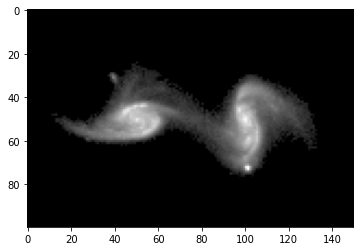

In [18]:
# Function in Image Creator that modifes
# exsiting target images to match new image

# Grab new target image
tImg = ic.adjustTargetImage( tInfo, new_params[newName], overWrite=True)

if type(tImg) != type(None):
    plt.imshow( tImg, cmap='gray')

else:
    print("WARNING!  Target image not found")

___
## Step 5
### Test if SIMR pipeline can create the new model image!

IM: run_info_class.__init__
	 - runDir:  /home/mbo2d/587722984435351614/zoo_merger_models/run_00000/
Run 'r00000' Good!
True
SIMR.pipelineRun: Inputs
	 - rDir: None
	 - rInfo: <class 'Support_Code.info_module.run_info_class'>
SIMR.pipelineRun: 
	 - rInfo:  <Support_Code.info_module.run_info_class object at 0x7f9cca88ffa0>
IC: image_creator_run
IC: rInfo.status:  True
MS: Run:    1 /    1
MS: target_image_compare: zoo_test


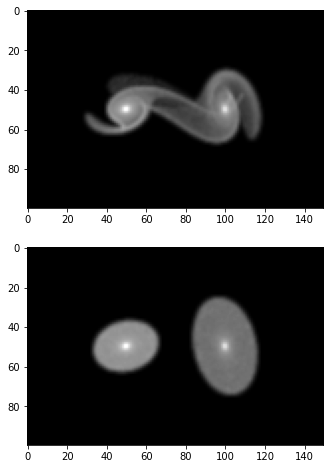

In [19]:
# Get run info class
rInfo = tInfo.getRunInfo( rID='r00000' )

if rInfo.status == False:
    print("WARNING")
else:
    print("Run '%s' Good!"%rInfo.get('run_id'))
    print(rInfo.get('tInfo').status)

# Define arguments for executing simr
newImgArg = gm.inArgClass( )
newImgArg.setArg( 'rInfo', rInfo )  # Give rInfo
newImgArg.setArg( 'scoreParams', new_params )  # Give new parameter
newImgArg.setArg( 'printAll', False )  # Print all if you need to troubleshoot
newImgArg.setArg( 'newImage', True )  # Make true if you want new image
newImgArg.setArg( 'newScore', True )  # Make sure it can create a new score as well.
newImgArg.setArg( 'overWrite', True )  # Make true if you need to overwrite


# Run through simr image creation
simr.simr_run( rInfo=rInfo, arg = newImgArg )

fig, ax = plt.subplots(2,1,figsize=(8,8))

ax[0].imshow(rInfo.getModelImage(newName), cmap='gray')
ax[1].imshow(rInfo.getModelImage(newName,initImg=True), cmap='gray')

___
## Step 5.1
### View results for the new Model Image!

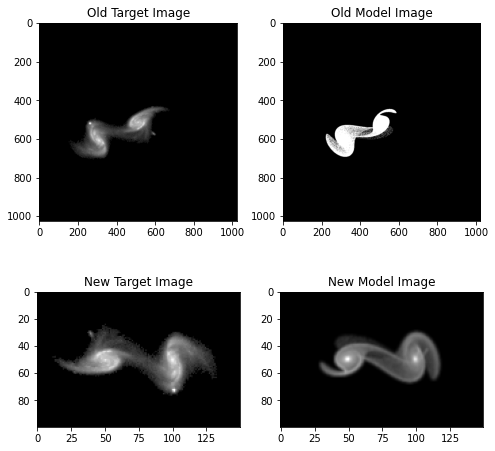

In [20]:
# View new model image next to target image
mImg = rInfo.getModelImage( newName )

fig, ax = plt.subplots(2,2,figsize=(8,8))

ax[0,0].set_title("Old Target Image")
ax[0,0].imshow( tInfo.getTargetImage(old_param['targetName']), cmap='gray' )

ax[0,1].set_title("Old Model Image")
ax[0,1].imshow( rInfo.getModelImage( old_param['imgArg']['name'] ), cmap='gray' )

ax[1,0].set_title("New Target Image")
ax[1,0].imshow(tImg,cmap='gray')

ax[1,1].set_title("New Model Image")
ax[1,1].imshow(mImg,cmap='gray')

___
## Step 6
### Save your new image parameters!

In [29]:
# After testing with test, Create a blank group score parameter and copy starting parameters
newName = 'zoo_test'
save_params = {}
save_params[newName] = deepcopy( new_params['zoo_test'] )

# ALWAYS modify the names
save_params[newName]['name'] = newName
save_params[newName]['imgArg']['name'] = newName

# Leave a comment if its for a specific experiment
cmt = 'Smaller Image by Matthew.'
save_params[newName]['imgArg']['comment'] = cmt

# NOTE!: If image size and/or galaxy centers are modified,
#        you'll need to create a new target image to match.
save_params[newName]['targetName'] = newName

# Add to target image repository
tInfo.addImageParams( save_params )
tImg = ic.adjustTargetImage( tInfo, save_params[newName], overWrite=True)

#gm.pprint(tInfo.getImageParams())

***
## Step 7
### Go through all models and see if new image improves results!
WARNING: This may take 20+ minutes

In [33]:
# Define arguments for executing simr target
newScoreArg = gm.inArgClass( )
newScoreArg.setArg( 'scoreParams', new_params )  # Give new parameter
newScoreArg.setArg( 'printAll', False )  # Print all if you need to troubleshoot
newScoreArg.setArg( 'newImage', True )  # Make true if you want new image
newScoreArg.setArg( 'newScore', True )  # Make true if you want new image
newScoreArg.setArg( 'overWrite', False )  # Overwrite existing files and scores?

# Run through simr target image and score creation
simr.simr_target( tInfo = tInfo, arg = newScoreArg )


SIMR: pipelineTarget: input
	 - tDir: None
	 - tInfo: <class 'Support_Code.info_module.target_info_class'>
SIMR: simr_target status:
	 - tInfo.status: True
SIMR: new_target_scores:
	 - tInfo: True
	 - Scores already exist


Index(['run_id', 'zoo_merger_score', 'base0_corr', 'base0_diff',
       'base0_diff_scale', 'base0_diff_scale1', 'base0_diff_scale2',
       'base0_overlap0', 'base0_overlap1', 'base0_overlap2', 'base0_overlap3',
       'base0_bcorr0', 'base0_bcorr1', 'base0_bcorr2', 'base0_bcorr3',
       'base_score', 'base_perturbation', 'new_score', 'base0_ssim',
       'zoo_test', 'zoo_0', 'zoo_test_3'],
      dtype='object')
0       0.809782
1       0.790304
2       0.419647
3       0.712752
4       0.809566
          ...   
1288    0.770377
1289    0.763253
1290    0.810800
1291    0.808363
1292    0.831865
Name: zoo_test, Length: 1293, dtype: float64
SA: valid scores: 1288
      zoo_merger_score  zoo_test  base_perturbation
0             0.918919  0.809782           0.713520
1             0.941176  0.790304           0.716723
4             0.914286  0.809566           0.714464
5             0.916667  0.803049           0.689120
6             0.911765  0.833787           0.747388
...            

<AxesSubplot:title={'center':'zoo_test:\nCorr: -0.0060'}, xlabel='zoo_merger_score', ylabel='zoo_test'>

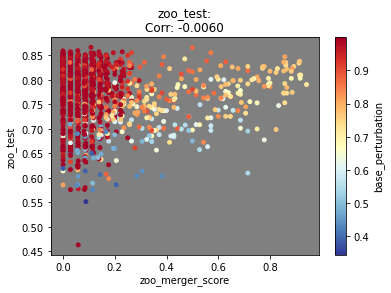

In [34]:
scores = tInfo.getScores()
print(scores.columns)
print(scores['zoo_test'])
#fig, ax = plt.subplots(1,2,figsize=(12,12))
#ax[0] = sa.getNamedPlot(scores, sName='zoo_0')
sa.getNamedPlot( scores, sName='zoo_test', printAll=True)